# **Importing TensorFlow**

TensorFlow is a free and open-source software library for machine learning. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks. Tensorflow is a symbolic math library based on dataflow and differentiable programming.

In [1]:
import tensorflow as tf
print("You are using TensorFlow version", tf.__version__)
if len(tf.config.list_physical_devices('GPU')) > 0:
  print("You have a GPU enabled.")
else:
  print("Enable a GPU before running this notebook.")

You are using TensorFlow version 2.4.1
Enable a GPU before running this notebook.


We will use Keras: TensorFlow's user-friendly API to define neural networks. Let's import Keras now.

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt

# **Download the MNIST dataset**

In [3]:
dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print("There are ",train_images.shape , " training images.")

There are  (60000, 28, 28)  training images.


In [5]:
print("There are ", test_images.shape , "testing images" )

There are  (10000, 28, 28) testing images


In [6]:
print(train_labels,) #Each label is an integer between 0-9:

[9 0 0 ... 3 0 5]


# **Preprocess the data**

The pixel values in the images range between 0 and 255. Let's normalize the values 0 and 1 by dividing all the images by 255. It's important that the training set and the testing set are preprocessed in the same way.

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# *Display first 25 images*

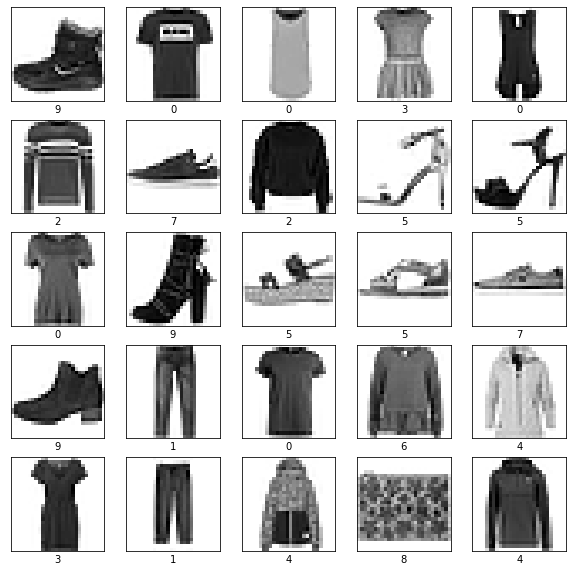

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)  #The subplots() function takes three arguments that describes the layout of the figure.
                          #The layout is organized in rows and columns, which are represented by the first and second argument.
                          #The third argument represents the index of the current plot.
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i] , cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# **Creating Layers**

Neural networks are made up of layers. 
The "Deep" in "Deep Learning" refers to the depth of the network. Deeper networks can learn increasingly abstract patterns. Roughly, the width of a layer (in terms of the number of neurons) refers to the number of patterns it can learn of each type.
Most of deep learning consists of chaining together simple layers.

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# **Compile the model**


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Loss function — This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.

Optimizer — This is how the model is updated based on the data it sees and its loss function.

Metrics — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

# **Train the model**
Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.

The model learns to associate images and labels.

You ask the model to make predictions about a test set—in this example, the test_images array.

Verify that the predictions match the labels from the test_labels array.

To begin training, call the model.fit method — so called because it "fits" the model to the training data:

In [11]:
EPOCHS=10
model.fit(train_images, train_labels, epochs=EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6325 - accuracy: 0.7772
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3659 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3351 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3044 - accuracy: 0.8874
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2874 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2705 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2576 - accuracy: 0.9040
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2463 - accuracy: 0.9060
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2331 - accuracy: 0.9105
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.227

# **Evaluate Accuracy**
Next, compare how the model performs on the test dataset:

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 882us/step - loss: 0.3370 - accuracy: 0.8855

Test accuracy: 0.8855000138282776


# **Make predictions**
With the model trained, you can use it to make predictions about some images.

In [13]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:


[3.4104306e-07 3.7968874e-08 7.1873114e-07 7.1625511e-10 1.2655086e-07
 2.4540785e-03 7.4571398e-07 3.4401487e-03 1.3447117e-08 9.9410385e-01]


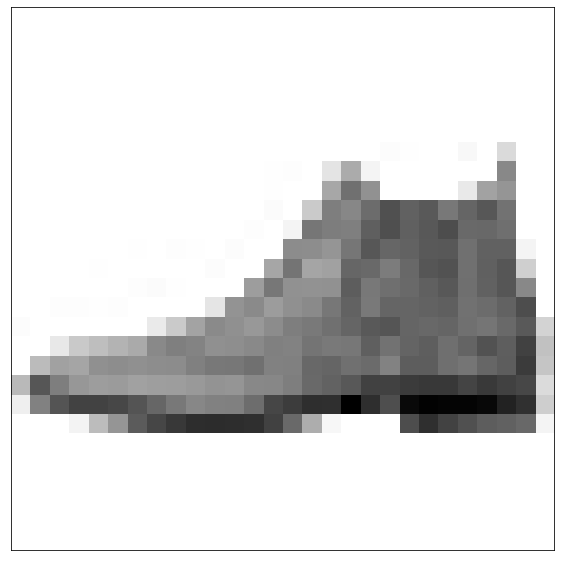

In [14]:
print(predictions[0])
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(test_images[0], cmap=plt.cm.binary)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 digits. You can see which label has the highest confidence value:

In [15]:
print(tf.argmax(predictions[0]))

tf.Tensor(9, shape=(), dtype=int64)


In [16]:
history = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2219 - accuracy: 0.9154 - val_loss: 0.3254 - val_accuracy: 0.8919
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2153 - accuracy: 0.9183 - val_loss: 0.3424 - val_accuracy: 0.8813
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2056 - accuracy: 0.9220 - val_loss: 0.3204 - val_accuracy: 0.8919
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1985 - accuracy: 0.9235 - val_loss: 0.3445 - val_accuracy: 0.8886
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1919 - accuracy: 0.9265 - val_loss: 0.3648 - val_accuracy: 0.8835
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1892 - accuracy: 0.9278 - val_loss: 0.3482 - val_accuracy: 0.8873
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1825 - accuracy: 0.9304 - val_loss: 0.3508 - val_accuracy:

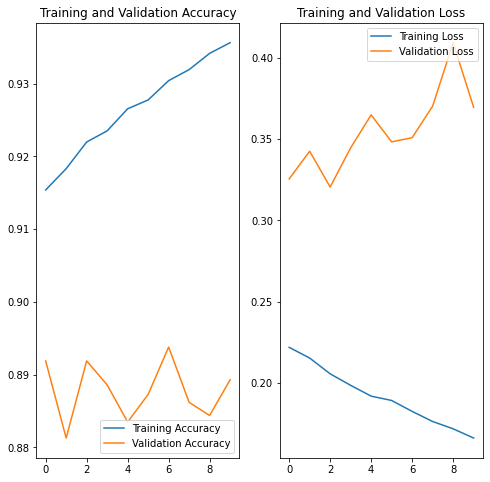

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
 
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs_range = range(EPOCHS)
 
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
 
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()